# 理想低通滤波
## 原理回顾
理想低通滤波器在频率域中工作，其传递函数为$$H(u,v)=\left\{\begin{matrix}1, & D(u,v)\leq D_{0}\\ 0, & D(u,v)>D_{0}\end{matrix}\right.$$

其中$D(u,v)=\sqrt{u^{2}+v^{2}}$表示频率域中的点$(u, v)$到原点的距离，$D_0$是截止频率。

通过设置截止频率$D_0$，可以决定哪些频率成分能够通过滤波器（低频成分，$D(u,v)\leq D_{0}$时），哪些会被截断（高频成分，$D(u,v)> D_{0}$时），以此来滤除图像中的高频噪声，但也可能导致图像的边缘和细节（这些通常属于高频成分）变得模糊。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def ideal_lowpass_filter(image, D0):
    """
    对输入图像进行理想低通滤波
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param D0: 截止频率
    :return: 理想低通滤波后的图像（numpy数组表示）
    """
    # 获取图像的高度和宽度
    height, width = image.shape[:2]
    t_image_filtered = [[0 for _ in range(width)] for _ in range(height)]
    image_filtered = [[0 for _ in range(width)] for _ in range(height)]
    # 对图像进行快速傅里叶变换，将图像转换到频率域
    f = np.fft.fft2(image)
    # 将零频率分量移到频谱的中心
    fshift = np.fft.fftshift(f)

    # 创建与频率域图像大小相同的滤波器掩模（全1）
    rows, cols = fshift.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)

    # 根据截止频率设置滤波器掩模
    for u in range(rows):
        for v in range(cols):
            D_uv = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D_uv > D0:
                mask[u, v] = 0

    # 将滤波器掩模应用到频率域图像上
    fshift_filtered = fshift * mask

    # 将零频率分量移回原来的位置
    f_ishift = np.fft.ifftshift(fshift_filtered)

    # 进行逆快速傅里叶变换，将图像转换回空间域
    image_filtered = np.abs(image_filtered).astype(np.uint8)
    return t_image_filtered

### 代码解释
- **`ideal_lowpass_filter`函数**：
    - 该函数接受两个参数，`image`是输入的灰度图像，以二维的`numpy`数组形式传入（通过`cv2.imread`以灰度图模式读取图像得到的就是这种格式），`D0`是理想低通滤波器的截止频率，它决定了哪些频率成分会被滤除。
    - 在函数内部，首先通过`image.shape[:2]`获取图像的高度和宽度。然后使用`np.fft.fft2`函数对图像进行快速傅里叶变换（`FFT`），将图像从空间域转换到频率域，得到`f`。接着使用`np.fft.fftshift`函数将零频率分量移到频谱的中心，得到`fshift`，这样便于后续进行滤波器掩模的设置和操作。
    - 之后创建一个与频率域图像大小相同的全`1`的滤波器掩模`mask`（初始时假设所有频率成分都能通过），其数据类型为`np.float32`。通过循环遍历掩模的每个像素（对应频率域中的每个点），计算该点到频谱中心的距离`D_uv`，根据公式$$D(u,v)=\sqrt{(u - crow) ** 2 + (v - ccol) ** 2}$$
    - 这里`crow`和`ccol`分别是频谱中心的行和列索引），如果距离大于截止频率`D0`，就将掩模对应位置的元素设置为`0`，表示截断该频率成分。
    - 接着将滤波器掩模`mask`与频率域图像`fshift`对应元素相乘，实现滤波器的应用，得到`fshift_filtered`，即滤除高频成分后的频率域图像。再使用`np.fft.ifftshift`函数将零频率分量移回原来的位置，得到`f_ishift`。
    - 最后使用`np.fft.ifft2`函数对`f_ishift`进行逆快速傅里叶变换，将图像从频率域转换回空间域，得到`image_filtered`。由于逆变换后的结果可能包含虚部（在实际图像中我们只关注实部，也就是取绝对值），所以使用`np.abs`函数取绝对值，并通过`astype(np.uint8)`将其转换为8位无符号整数类型（符合图像像素值的常见数据类型要求），返回滤波后的图像。

### 用法示例

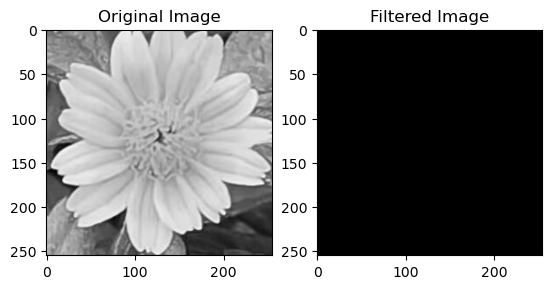

In [13]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 设置截止频率，可根据实际情况调整
D0 = 70
# 进行理想低通滤波
filtered_image = ideal_lowpass_filter(image, D0)

# 使用matplotlib在Jupyter Notebook中显示原始图像和滤波后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.show()